In [2]:
!pip install ecoscope -U

In [1]:
#import ecoscope
#ecoscope.init(selenium=True, silent=True)

TypeError: descriptor '__call__' for 'type' objects doesn't apply to a 'property' object

In [2]:
import requests 
from requests.auth import HTTPBasicAuth
import json
import pandas as pd 
from pandas import DataFrame
import geopandas as gpd
from matplotlib import artist
import matplotlib.pyplot as plt
import contextily as ctx
from smartapi import smart_api
import datetime

import os
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import json

import shapely
import plotly as pl
import plotly.express as px
import plotly.graph_objects as go

In [3]:
def create_ecoscope_map(df, column, title):
    m = ecoscope.mapping.EcoMap(**{
        'tiles': '',
        'static': True,
        'height': 600,
        'width': 971,
       ' search_control': False,
        })
    
    m.add_title(title = title,
                font_size= '18px',
                location= 'upper',
                )
    
    # Add tile layers
    
    m.add_tile_layer(**{
        'url': 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
        #'opacity': 0.5,
        'opacity': 1,
        'name': 'Esri',
        'attribution': 'Esri',
        })
    m.add_tile_layer(**{
        'url': 'https://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
        'opacity': 0.25,
        'name': 'Esri',
        'attribution': 'Esri',
        })
    
    # add north arrow
    m.add_north_arrow(**{'position': 'topleft', 'scale': 0.8})
    
    # add the event data
    m.add_gdf(df, **{
        'column': column,
        'cmap': 'RdYlGn',
        'categorical': True,
        'scheme': None,
        'legend_kwds': {'loc': 'top right'},
        'marker_kwds': {'radius': 2},
        })
    
    # zoom to the dataset
    m.zoom_to_gdf(df)

    # display the map
    return m

In [6]:
urlBase = 'http://localhost:8000/'
username = 'oliver.adolph'
password = 'PMK#!?eGT6ExX=<i'
username = 'smartadmin'
password = 'smart1234'
ca_uuid = "a2516167-3da8-440e-b56b-6f68c2f11d53"
language_uuid = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
smart = smart_api(urlBase = urlBase, username= username, password = password, ca_uuid = ca_uuid, language_uuid = language_uuid)
token = smart.login()

http://localhost:8000/
http://localhost:8000/
<Response [200]>


In [24]:
params = {}
params["ca_uuid"] = "a2516167-3da8-440e-b56b-6f68c2f11d53"
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params['start_date'] = '2024-03-20'
params['end_date'] = '2024-04-20'
params['randomize'] = False
dfPatrol = smart.query_geojson_data(f'patrol/find/', params=params)

In [25]:
dfPatrol

663

In [27]:
dfPatrol = dfPatrol[0:5]
len(dfPatrol)
for patrol in dfPatrol.iloc():
    print(patrol.id)
    df = smart.query_data(f'track/verify/', {'patrol_id': patrol.id})
    df

NEWPATROL_000550
NEWPATROL_000551
NEWPATROL_000553
NEWPATROL_000554
NEWPATROL_000555


In [7]:
#track_uuid = '02cac670-f17e-4bde-a93c-35cd554059ae'
#track_uuid = '4aa986d9-dbb9-4b3a-849e-c4edc57b22b6'
patrol_id = 'NEWPATROL_000668'
patrol_id = 'EichabR_000566'
patrol_id = 'EichabR_000567'
patrol_id = 'EichabR_000568'
patrol_id = 'NdjitezeuaG_000592'
patrol_id = 'NEWPATROL_000558'
patrol_id = 'NEWPATROL_000566'
#patrol_id = 'NEWPATROL_000658'
#patrol_id = 'NEWPATROL_000754'
#patrol_id = 'NEWPATROL_000949'
df = smart.query_data(f'track/verify/', {'patrol_id': patrol_id})
df

track_id      speed     distance      time     heading  point1_lon  \
0          1   0.000000     0.000000     1.437    0.000000   14.364512   
1          1   1.988794   208.430601   377.289   39.084171   14.364512   
2          1   4.558248   653.169087   515.858   38.324483   14.365768   
3          1   4.760868   399.955211   302.432   39.802733   14.369642   
4          1   4.854773   407.880460   302.459   36.377844   14.372090   
5          1   4.734354   399.812240   304.017   35.743842   14.374403   
6          1   4.669320   392.300730   302.460   60.605476   14.376637   
7          1   3.563102   318.406753   321.704   66.794371   14.379905   
8          1  23.619659    65.787312    10.027   48.115187   14.382703   
9          1   4.751835   516.013673   390.933   52.319378   14.383172   
10         1   4.827248   405.550496   302.446   44.231667   14.387077   
11         1   4.953376   676.334007   491.544    5.442367   14.389782   
12         1   4.071641   343.183914   303.431    3.669416   14.390395   
13         1   4.085214   345.384392   304.362    9.704813   14.390605   
14         1   2.694894   404.587357   540.472   18.853366   14.391162   
15         1   2.423698   216.877921   322.136   11.686381   14.392412   
16         1   4.303425   517.644697   433.032   19.250603   14.392832   
17         1   4.502104   378.239240   302.450   33.547165   14.394463   
18         1   4.390700   393.038422   322.258   56.453613   14.396462   
19         1   5.364195   471.390536   316.358   59.342876   14.399593   
20         1   5.213298   704.891429   486.757   65.323852   14.403470   
21         1   5.232822   441.099291   303.461   68.870812   14.409593   
22         1   3.228419    84.249171    93.946   64.180129   14.413527   
23         1   5.269939   579.855760   396.111   77.411047   14.414252   
24         1   5.347948  2613.525785  1759.309   70.337872   14.419662   
25         1   3.358826   571.674111   612.722   94.668183   14.443188   
26         1   3.600807  1808.074124  1807.669   86.506479   14.448635   
27         1   0.205524     4.417617    77.380  294.803851   14.465887   
28         2   0.785565     0.348703     1.598   90.000001   14.465848   
29         2  17.262969  1640.322516   342.071   80.501617   14.465852   
30         2   4.936660   621.995843   453.583   83.293707   14.481317   
31         2  10.190916  5825.883512  2058.027   76.484059   14.487222   
32         2   1.181016    31.986837    97.503  266.013219   14.541365   
33         2   0.605142    25.887996   154.008  329.209641   14.541060   
34         2   4.252497     1.667924     1.412  180.000000   14.540933   
35         2   0.547882     5.567851    36.585  329.928988   14.540933   

    point1_lat     point1_timestamp  point2_lon  point2_lat  \
0   -19.881780  2024-04-04 09:03:45   14.364512  -19.881780   
1   -19.881780  2024-04-04 09:03:47   14.365768  -19.880325   
2   -19.880325  2024-04-04 09:10:04   14.369642  -19.875717   
3   -19.875717  2024-04-04 09:18:40   14.372090  -19.872953   
4   -19.872953  2024-04-04 09:23:42   14.374403  -19.870000   
5   -19.870000  2024-04-04 09:28:45   14.376637  -19.867082   
6   -19.867082  2024-04-04 09:33:49   14.379905  -19.865350   
7   -19.865350  2024-04-04 09:38:51   14.382703  -19.864222   
8   -19.864222  2024-04-04 09:44:13   14.383172  -19.863827   
9   -19.863827  2024-04-04 09:44:23   14.387077  -19.860990   
10  -19.860990  2024-04-04 09:50:54   14.389782  -19.858377   
11  -19.858377  2024-04-04 09:55:56   14.390395  -19.852322   
12  -19.852322  2024-04-04 10:04:08   14.390605  -19.849242   
13  -19.849242  2024-04-04 10:09:11   14.391162  -19.846180   
14  -19.846180  2024-04-04 10:14:16   14.392412  -19.842737   
15  -19.842737  2024-04-04 10:23:16   14.392832  -19.840827   
16  -19.840827  2024-04-04 10:28:38   14.394463  -19.836432   
17  -19.836432  2024-04-04 10:35:51   14.396462  -19.833597   
18  -19.833597  2024-04-04 10:40:54   14.399593  -19.831643   
19  -

<Axes: xlabel='point1_timestamp'>

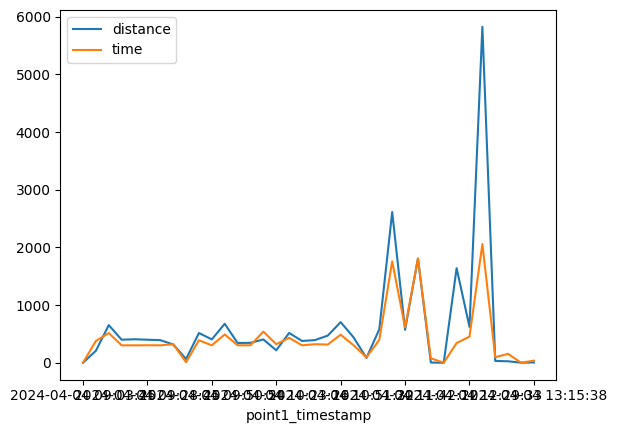

In [8]:
df.plot(x='point1_timestamp',y=['distance','time'])

<Axes: xlabel='point1_timestamp'>

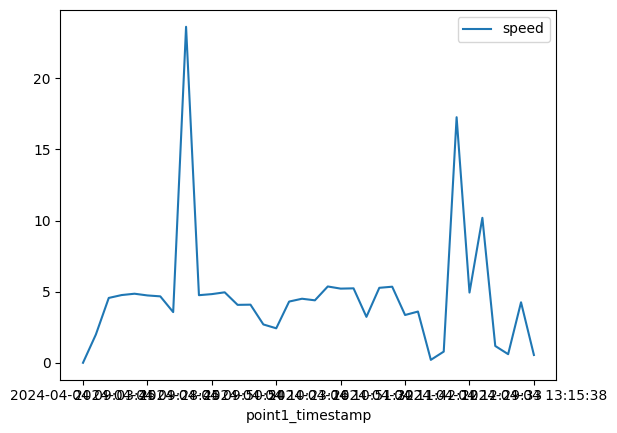

In [9]:
df.plot(x='point1_timestamp',y=['speed'])

<Axes: xlabel='point1_timestamp'>

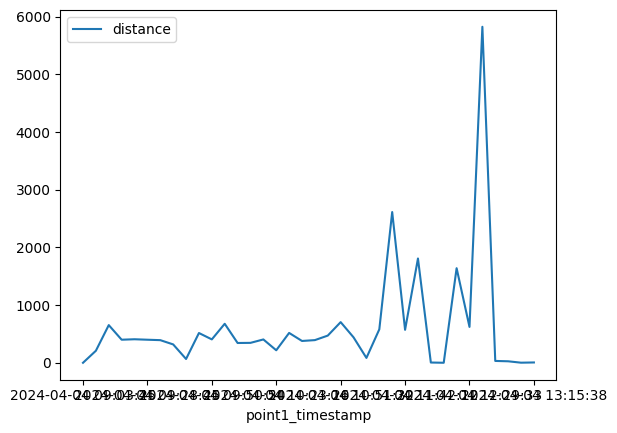

In [10]:
df.plot(x='point1_timestamp',y=['distance'])

<Axes: >

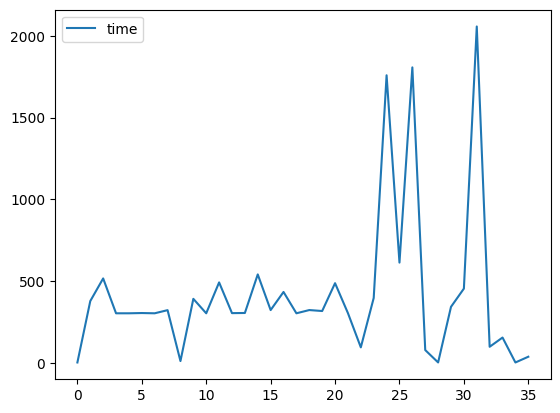

In [11]:
df.plot(y=['time'])

In [12]:
df['distance'].sum()/1000

22.475435518552878

In [13]:
params = {}
params["ca_uuid"] = "a2516167-3da8-440e-b56b-6f68c2f11d53"
params["language_uuid"] = "2af26704-7dd9-4a77-bbd4-c1953800d4f8"
params['patrol_id'] = patrol_id
params['randomize'] = False
dfPatrol = smart.query_geojson_data(f'patrol/find/', params=params)

In [7]:
dfPatrol.explore(tile='Stamen Terrain')

In [8]:
create_ecoscope_map(dfPatrol, 'id', 'SMART Patrols')

NameError: name 'ecoscope' is not defined